# 0.0. IMPORTS

In [1]:
import datetime
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from kaggle.api.kaggle_api_extended import KaggleApi
from os import remove
from zipfile import ZipFile

## 0.1. Helper Functions

## 0.2. Seeds

## 0.3. Loading Data

In [2]:
kaggle = KaggleApi()
kaggle.authenticate()
kaggle.dataset_download_file('hariharanpavan/bank-marketing-dataset-analysis-classification', 'bank-full.csv')

with ZipFile('bank-full.csv.zip', 'r') as Zip:
    Zip.extractall()
    
df_raw = pd.read_csv('bank-full.csv')

remove('bank-full.csv')
remove('bank-full.csv.zip')

# 1.0. DATA DESCRIPTION

In [3]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [4]:
df1.columns = ['age', 'job', 'marital_status', 'education_level', 'default', 'balance', 'housing_loan',
               'loan', 'contact_way', 'day_of_month_lc', 'month_lc', 'duration_lc', 'contact_count', 'days_p',
               'contact_count_p', 'y_p', 'y']

## 1.2. Data Dimensions

In [5]:
print("Number of Rows: {}".format(df1.shape[0]))
print("Number of Columns: {}".format(df1.shape[1]))

Number of Rows: 45211
Number of Columns: 17


## 1.3. Data Types

In [6]:
# Rectifying Booleans
df1 = df1.applymap(lambda x: True if x == 'yes' else x)
df1 = df1.applymap(lambda x: False if x == 'no' else x)

df1.dtypes

age                 int64
job                object
marital_status     object
education_level    object
default              bool
balance             int64
housing_loan         bool
loan                 bool
contact_way        object
day_of_month_lc     int64
month_lc           object
duration_lc         int64
contact_count       int64
days_p              int64
contact_count_p     int64
y_p                object
y                    bool
dtype: object

## 1.4. Check NA

In [7]:
df1 = df1.applymap(lambda x: np.nan if x == 'unknown' else x)
df1.isna().sum()

age                    0
job                  288
marital_status         0
education_level     1857
default                0
balance                0
housing_loan           0
loan                   0
contact_way        13020
day_of_month_lc        0
month_lc               0
duration_lc            0
contact_count          0
days_p                 0
contact_count_p        0
y_p                36959
y                      0
dtype: int64

## 1.5. Fillout NA

In [8]:
#job                  
df1['job'] = df1['job'].fillna('unemployed')

# education_level 
df1['education_level'] = df1['education_level'].fillna("secondary")

#contact_way        
df1['contact_way'] = df1['contact_way'].fillna("cellular")

#y_p                
df1['y_p'] = df1['y_p'].fillna("failure")

## 1.6. Change Data Types

## 1.7. Descriptive Statistics

In [9]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'bool'])
bool_attributes = df1.select_dtypes(include = ['bool'])

### 1.7.1 Numerical Attributes

In [10]:
# Central Tendency
means = pd.DataFrame(num_attributes.apply(np.mean)).T
medians = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion
stds = pd.DataFrame(num_attributes.apply(np.std)).T
skews = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
kurtoses = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
maxima = pd.DataFrame(num_attributes.apply(max)).T
minima = pd.DataFrame(num_attributes.apply(min)).T
value_range = pd.DataFrame(num_attributes.apply(lambda x: max(x) - min(x))).T

In [11]:
stats = pd.concat([minima, maxima, value_range, means, medians, stds, skews, kurtoses]).T
stats.columns = ["Min", "Max", "Range", "Mean", "Median", "Std", "Skew", "Kurtosis"]
stats

,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
age,18.0,95.0,77.0,40.936210,39.0,10.618645,0.684818,0.319570
balance,-8019.0,102127.0,110146.0,1362.272058,448.0,3044.732156,8.360308,140.751547
day_of_month_lc,1.0,31.0,30.0,15.806419,16.0,8.322384,0.093079,-1.059897
duration_lc,0.0,4918.0,4918.0,258.163080,180.0,257.524964,3.144318,18.153915
contact_count,1.0,63.0,62.0,2.763841,2.0,3.097987,4.898650,39.249651
days_p,-1.0,871.0,872.0,40.197828,-1.0,100.127639,2.615715,6.935195
contact_count_p,0.0,275.0,275.0,0.580323,0.0,2.303416,41.846454,4506.860660


### 1.7.2. Categorical Attributes

In [12]:
cat_attributes.apply(lambda x: x.unique().shape[0])

job                11
marital_status      3
education_level     3
contact_way         2
month_lc           12
y_p                 3
dtype: int64

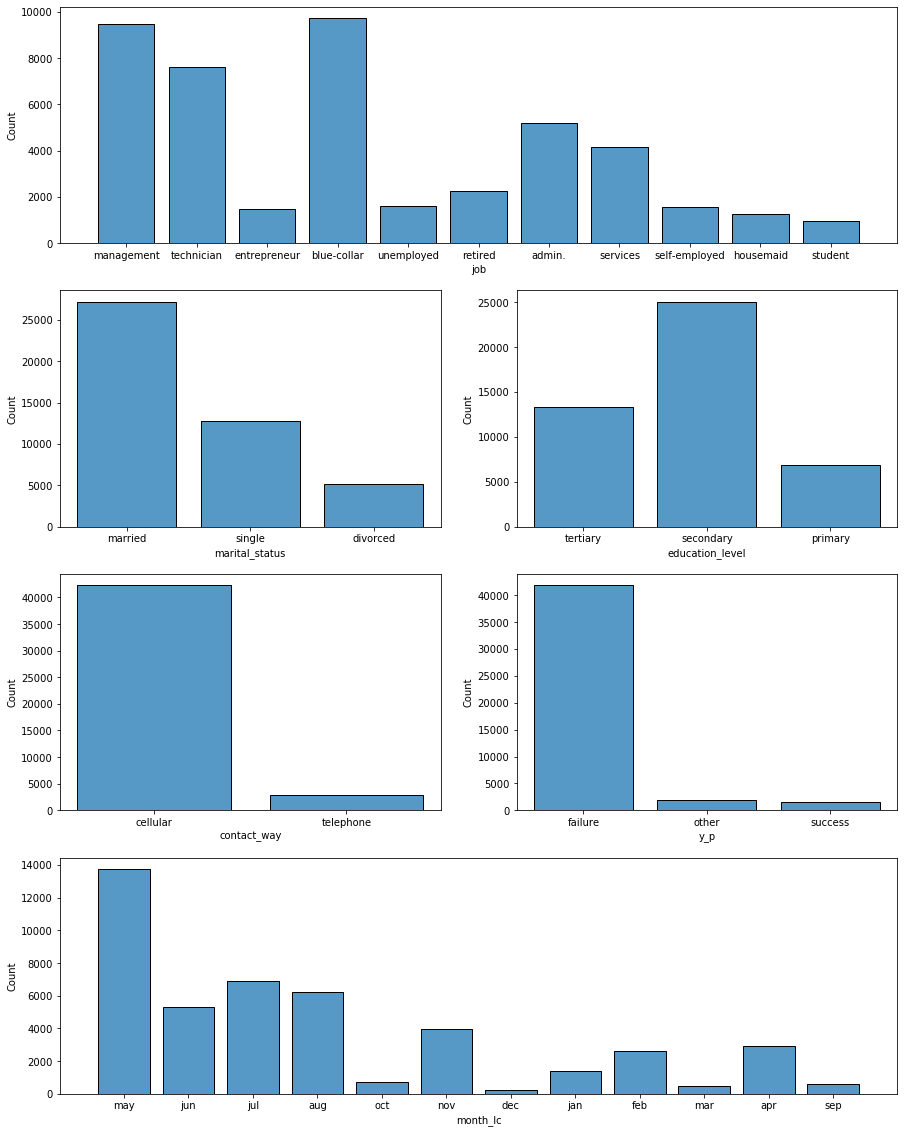

In [13]:
plt.figure(figsize = [15, 20])

plt.subplot(4, 1, 1)
sns.histplot(x = 'job', data = cat_attributes, shrink=.8)

plt.subplot(4, 2, 3)
sns.histplot(x = 'marital_status', data = cat_attributes, shrink=.8)

plt.subplot(4, 2, 4)
sns.histplot(x = 'education_level', data = cat_attributes, shrink=.8)

plt.subplot(4, 2, 5)
sns.histplot(x = 'contact_way', data = cat_attributes, shrink=.8)

plt.subplot(4, 2, 6)
sns.histplot(x = 'y_p', data = cat_attributes, shrink=.8)

plt.subplot(4, 1, 4)
sns.histplot(x = 'month_lc', data = cat_attributes, shrink=.8, hue_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'out', 'nov', 'dec'])

### 1.7.3. Booleans Attributes

In [68]:
bool_attributes.sample()

,default,housing_loan,loan,y
12496,False,False,True,False


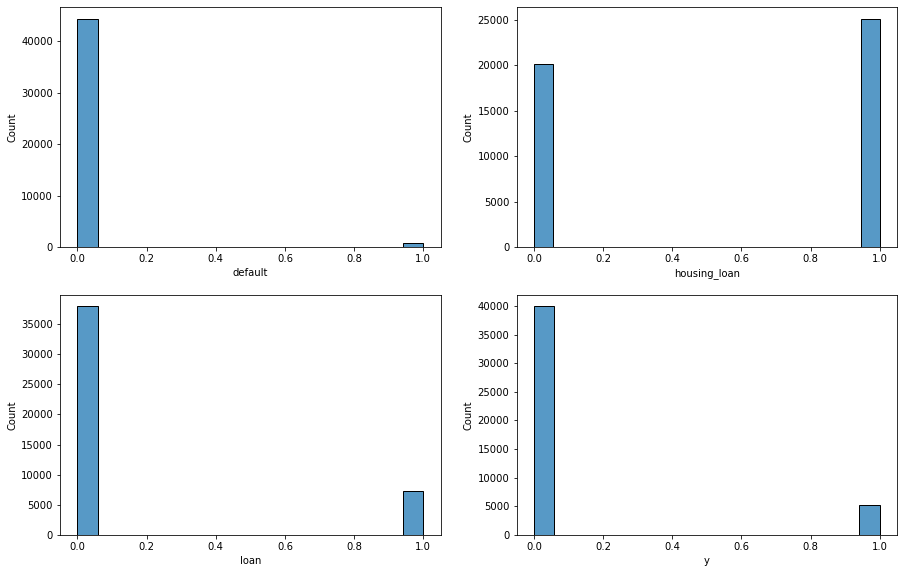

In [15]:
aux = bool_attributes.applymap(lambda x: 1 if x == True else 0)

plt.figure(figsize = [15, 15])

plt.subplot(3, 2, 1)
sns.histplot(x = 'default', data = aux)

plt.subplot(3, 2, 2)
sns.histplot(x = 'housing_loan', data = aux)

plt.subplot(3, 2, 3)
sns.histplot(x = 'loan', data = aux)

plt.subplot(3, 2, 4)
sns.histplot(x = 'y', data = aux)

# 2.0. FEATURE ENGINEERING

In [88]:
df2 = df1.copy()

## 2.1. Hypotheses

**1.** Customers older than 50 are more likely to subscribe;

**2.** Unemployed customers are more likely not to subscribe;

**3.** Customers whose education level is secondary are more likely to subscribe;

**4.** Defaulted customers are not likely to subscribe;

**5.** Customers who have not defaulted but with debt tend to subscribe;

**6.**  Campaign calling may last longer if the customer subscribes;

**7.** First contact is the only one that matters;

**8.** People who subscribed to the last marketing campaign tend to subscribe to a new one.

## 2.2. Features

In [113]:
# Loans
df2['total_loan'] = (df2['loan'] | df2['housing_loan'])

# Datetimes
df2['month_lc_num'] = df2["month_lc"].apply(lambda x: datetime.datetime.strptime(x, "%b").month)
df2["date_lc"] = df2.apply(lambda x: datetime.datetime(year = 2022, month = x['month_lc_num'], day = x['day_of_month_lc']), axis = 1)
df2['week_of_year_lc'] = df2['date_lc'].dt.weekofyear

# 3. VARIABLES FILTERING

In [114]:
df3 = df2.copy()

## 3.1. Row Filtering

In [123]:
df3 = df3[(df3['default'] == 0) & (df3['balance'] > 0)]

## 3.2. Columns Selection

In [124]:
df3.columns

Index(['age', 'job', 'marital_status', 'education_level', 'default', 'balance',
       'housing_loan', 'loan', 'contact_way', 'day_of_month_lc', 'month_lc',
       'duration_lc', 'contact_count', 'days_p', 'contact_count_p', 'y_p', 'y',
       'total_loan', 'month_lc_num', 'date_lc', 'week_of_year_lc'],
      dtype='object')

In [128]:
drop_cols = ['contact_way', 'contact_count', 'loan', 'housing_loan', 'month_lc', 'date_lc']
df3 = df3.drop(drop_cols, axis = 1)